# Regression_FFNN

## load data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [ ]:
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('abalone.data', names = column_name)
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data_sex = data['Sex']
data_sex_encoded, data_sex_categories = data_sex.factorize()
data['Sex'] = data_sex_encoded

In [7]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### data one-hot encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder = OneHotEncoder()
data_sex_1hot = encoder.fit_transform(data_sex_encoded.reshape(-1, 1))

In [10]:
data_sex_1hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## data

In [11]:
X = data.copy()
y = X.pop('Rings')

In [12]:
print(X.shape, y.shape)

(4177, 8) (4177,)


## data split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (3341, 8), y_train : (3341,)
X_test : (836, 8), y_test : (836,)


# model base

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(128, activation='relu'),
    layers.Flatten(),
    layers.Dense(1)
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])

In [22]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 50us/sample - loss: 20.4981 - mae: 3.1391 - mse: 20.4981 - val_loss: 10.6142 - val_mae: 2.8134 - val_mse: 10.6142
Epoch 2/100
3341/3341 [==============================] - 0s 19us/sample - loss: 7.6232 - mae: 2.0172 - mse: 7.6232 - val_loss: 12.9678 - val_mae: 2.5886 - val_mse: 12.9678
Epoch 3/100
3341/3341 [==============================] - 0s 22us/sample - loss: 7.3729 - mae: 1.9735 - mse: 7.3729 - val_loss: 7.9356 - val_mae: 1.8093 - val_mse: 7.9356
Epoch 4/100
3341/3341 [==============================] - 0s 22us/sample - loss: 6.7695 - mae: 1.8832 - mse: 6.7695 - val_loss: 9.0797 - val_mae: 2.6054 - val_mse: 9.0797
Epoch 5/100
3341/3341 [==============================] - 0s 23us/sample - loss: 6.8783 - mae: 1.9293 - mse: 6.8783 - val_loss: 8.4396 - val_mae: 2.4493 - val_mse: 8.4396
Epoch 6/100
3341/3341 [==============================] - 0s 19us/sample - loss: 6.4150 - mae: 1.8

Epoch 95/100
3341/3341 [==============================] - 0s 22us/sample - loss: 4.5793 - mae: 1.5398 - mse: 4.5793 - val_loss: 5.4717 - val_mae: 1.8341 - val_mse: 5.4717
Epoch 96/100
3341/3341 [==============================] - 0s 30us/sample - loss: 4.7054 - mae: 1.5702 - mse: 4.7054 - val_loss: 5.7541 - val_mae: 1.9065 - val_mse: 5.7541
Epoch 97/100
3341/3341 [==============================] - 0s 24us/sample - loss: 4.9667 - mae: 1.6117 - mse: 4.9667 - val_loss: 4.7986 - val_mae: 1.5779 - val_mse: 4.7986
Epoch 98/100
3341/3341 [==============================] - 0s 23us/sample - loss: 4.5186 - mae: 1.5216 - mse: 4.5186 - val_loss: 4.8019 - val_mae: 1.4965 - val_mse: 4.8019
Epoch 99/100
3341/3341 [==============================] - 0s 19us/sample - loss: 4.8501 - mae: 1.5880 - mse: 4.8501 - val_loss: 4.9029 - val_mae: 1.5031 - val_mse: 4.9029
Epoch 100/100
3341/3341 [==============================] - 0s 19us/sample - loss: 4.4898 - mae: 1.5110 - mse: 4.4898 - val_loss: 4.9321 - val_mae

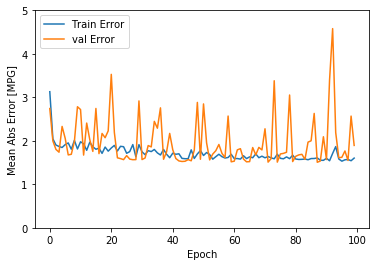

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

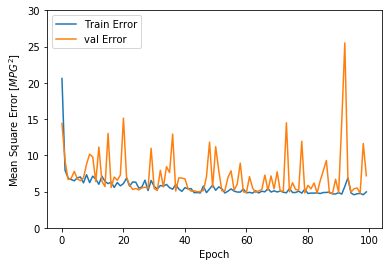

In [24]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [27]:
loss, mae, mse = model.evaluate(X_test, y_test)
mse**0.5

836/836 [==============================] - 0s 43us/sample - loss: 7.1826 - mae: 1.8946 - mse: 7.1826


2.680045768432385

## model_2 300epoch

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])

In [31]:
history = model.fit(X_train, y_train, 
                     epochs=300,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 0s 47us/sample - loss: 16.7844 - mae: 2.9032 - mse: 16.7844 - val_loss: 8.0803 - val_mae: 2.2517 - val_mse: 8.0803
Epoch 2/300
3341/3341 [==============================] - 0s 16us/sample - loss: 7.7341 - mae: 2.0216 - mse: 7.7341 - val_loss: 7.1404 - val_mae: 1.9056 - val_mse: 7.1404
Epoch 3/300
3341/3341 [==============================] - 0s 16us/sample - loss: 6.9265 - mae: 1.9059 - mse: 6.9265 - val_loss: 14.1215 - val_mae: 3.3569 - val_mse: 14.1215
Epoch 4/300
3341/3341 [==============================] - 0s 17us/sample - loss: 8.2713 - mae: 2.1429 - mse: 8.2713 - val_loss: 9.1704 - val_mae: 2.6119 - val_mse: 9.1704
Epoch 5/300
3341/3341 [==============================] - 0s 18us/sample - loss: 7.3256 - mae: 1.9992 - mse: 7.3256 - val_loss: 8.1874 - val_mae: 2.4080 - val_mse: 8.1874
Epoch 6/300
3341/3341 [==============================] - 0s 22us/sample - loss: 6.3893 - mae: 1.832

Epoch 95/300
3341/3341 [==============================] - 0s 22us/sample - loss: 4.5316 - mae: 1.5185 - mse: 4.5316 - val_loss: 5.8660 - val_mae: 1.6408 - val_mse: 5.8660
Epoch 96/300
3341/3341 [==============================] - 0s 17us/sample - loss: 4.5933 - mae: 1.5345 - mse: 4.5933 - val_loss: 6.3453 - val_mae: 2.0442 - val_mse: 6.3453
Epoch 97/300
3341/3341 [==============================] - 0s 24us/sample - loss: 4.7061 - mae: 1.5617 - mse: 4.7061 - val_loss: 6.8732 - val_mae: 2.1456 - val_mse: 6.8732
Epoch 98/300
3341/3341 [==============================] - 0s 22us/sample - loss: 4.8553 - mae: 1.5829 - mse: 4.8553 - val_loss: 5.4867 - val_mae: 1.7704 - val_mse: 5.4867
Epoch 99/300
3341/3341 [==============================] - 0s 15us/sample - loss: 4.6280 - mae: 1.5456 - mse: 4.6280 - val_loss: 4.8358 - val_mae: 1.4883 - val_mse: 4.8358
Epoch 100/300
3341/3341 [==============================] - 0s 14us/sample - loss: 4.9134 - mae: 1.6130 - mse: 4.9134 - val_loss: 4.9846 - val_mae

Epoch 143/300
3341/3341 [==============================] - 0s 17us/sample - loss: 4.5525 - mae: 1.5219 - mse: 4.5525 - val_loss: 6.2073 - val_mae: 1.7479 - val_mse: 6.2073
Epoch 144/300
3341/3341 [==============================] - 0s 17us/sample - loss: 4.4492 - mae: 1.4978 - mse: 4.4492 - val_loss: 4.9636 - val_mae: 1.5580 - val_mse: 4.9636
Epoch 145/300
3341/3341 [==============================] - 0s 15us/sample - loss: 4.5485 - mae: 1.5255 - mse: 4.5485 - val_loss: 4.8013 - val_mae: 1.5678 - val_mse: 4.8013
Epoch 146/300
3341/3341 [==============================] - 0s 14us/sample - loss: 4.5067 - mae: 1.5146 - mse: 4.5067 - val_loss: 5.8411 - val_mae: 1.8726 - val_mse: 5.8411
Epoch 147/300
3341/3341 [==============================] - 0s 15us/sample - loss: 4.4802 - mae: 1.5134 - mse: 4.4802 - val_loss: 4.8324 - val_mae: 1.5498 - val_mse: 4.8324
Epoch 148/300
3341/3341 [==============================] - 0s 16us/sample - loss: 4.5975 - mae: 1.5327 - mse: 4.5975 - val_loss: 4.9207 - va

Epoch 238/300
3341/3341 [==============================] - 0s 25us/sample - loss: 4.3665 - mae: 1.4969 - mse: 4.3665 - val_loss: 5.5657 - val_mae: 1.5542 - val_mse: 5.5657
Epoch 239/300
3341/3341 [==============================] - 0s 21us/sample - loss: 4.4808 - mae: 1.5082 - mse: 4.4808 - val_loss: 5.3161 - val_mae: 1.5353 - val_mse: 5.3161
Epoch 240/300
3341/3341 [==============================] - 0s 20us/sample - loss: 4.2999 - mae: 1.4765 - mse: 4.2999 - val_loss: 4.6448 - val_mae: 1.5337 - val_mse: 4.6448
Epoch 241/300
3341/3341 [==============================] - 0s 20us/sample - loss: 4.3060 - mae: 1.4801 - mse: 4.3060 - val_loss: 6.7779 - val_mae: 2.1011 - val_mse: 6.7779
Epoch 242/300
3341/3341 [==============================] - 0s 32us/sample - loss: 4.4611 - mae: 1.5256 - mse: 4.4611 - val_loss: 5.2458 - val_mae: 1.7560 - val_mse: 5.2458
Epoch 243/300
3341/3341 [==============================] - 0s 25us/sample - loss: 4.3887 - mae: 1.4968 - mse: 4.3887 - val_loss: 5.2434 - va

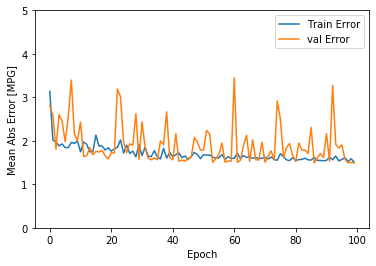

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

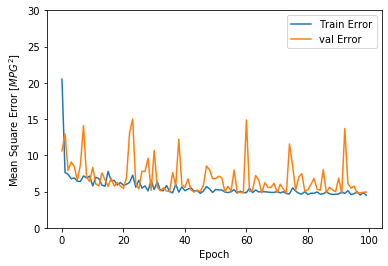

In [24]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [25]:
loss, mae, mse = model.evaluate(X_test, y_test)
mse**0.5

836/836 [==============================] - 0s 43us/sample - loss: 4.9321 - mae: 1.4919 - mse: 4.9321


2.2208394702399548

## model_3 add layers

In [26]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Flatten(),
    layers.Dense(1)
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])

In [29]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 57us/sample - loss: 24.5391 - mae: 3.8211 - mse: 24.5391 - val_loss: 10.2043 - val_mae: 2.7059 - val_mse: 10.2043
Epoch 2/100
3341/3341 [==============================] - 0s 24us/sample - loss: 11.6629 - mae: 2.6271 - mse: 11.6629 - val_loss: 10.5139 - val_mae: 2.1580 - val_mse: 10.5139
Epoch 3/100
3341/3341 [==============================] - 0s 26us/sample - loss: 9.2468 - mae: 2.2617 - mse: 9.2467 - val_loss: 7.2744 - val_mae: 2.0872 - val_mse: 7.2744
Epoch 4/100
3341/3341 [==============================] - 0s 31us/sample - loss: 6.8677 - mae: 1.9146 - mse: 6.8677 - val_loss: 9.0055 - val_mae: 2.5354 - val_mse: 9.0055
Epoch 5/100
3341/3341 [==============================] - 0s 31us/sample - loss: 8.7898 - mae: 2.2107 - mse: 8.7898 - val_loss: 9.0009 - val_mae: 1.9575 - val_mse: 9.0009
Epoch 6/100
3341/3341 [==============================] - 0s 26us/sample - loss: 7.1141 - mae: 1

3341/3341 [==============================] - 0s 25us/sample - loss: 4.8846 - mae: 1.5762 - mse: 4.8846 - val_loss: 5.1886 - val_mae: 1.5266 - val_mse: 5.1886
Epoch 95/100
3341/3341 [==============================] - 0s 37us/sample - loss: 4.8177 - mae: 1.5626 - mse: 4.8177 - val_loss: 5.9707 - val_mae: 1.9028 - val_mse: 5.9707
Epoch 96/100
3341/3341 [==============================] - 0s 28us/sample - loss: 4.5490 - mae: 1.5304 - mse: 4.5490 - val_loss: 5.3553 - val_mae: 1.7383 - val_mse: 5.3553
Epoch 97/100
3341/3341 [==============================] - 0s 26us/sample - loss: 4.7214 - mae: 1.5541 - mse: 4.7214 - val_loss: 7.8192 - val_mae: 2.3622 - val_mse: 7.8192
Epoch 98/100
3341/3341 [==============================] - 0s 37us/sample - loss: 4.7933 - mae: 1.5711 - mse: 4.7933 - val_loss: 11.1141 - val_mae: 2.8660 - val_mse: 11.1141
Epoch 99/100
3341/3341 [==============================] - 0s 36us/sample - loss: 5.4989 - mae: 1.6774 - mse: 5.4989 - val_loss: 4.6608 - val_mae: 1.4969 - v

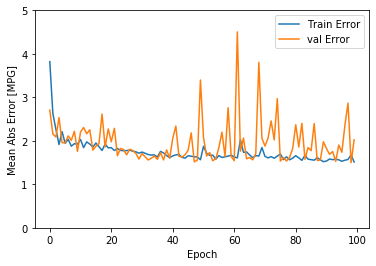

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

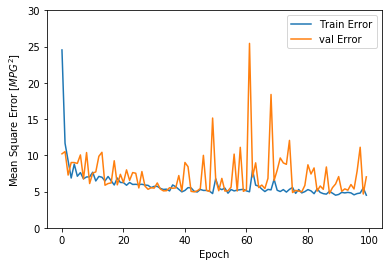

In [31]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [32]:
score = model.evaluate(X_test, y_test)
score

836/836 [==============================] - 0s 42us/sample - loss: 7.0302 - mae: 2.0220 - mse: 7.0302


[7.030184703580501, 2.022025, 7.0301847]

## model_4 base & input feature remove

In [31]:
n_data = data.copy()
n_data.pop('WholeWeight')
n_data.pop('ShuckedWeight')
n_data.pop('VisceraWeight')
n_data.pop('Shell weight')
n_data

,Sex,Length,Diameter,Height,Rings
0,0,0.455,0.365,0.095,15
1,0,0.350,0.265,0.090,7
2,1,0.530,0.420,0.135,9
3,0,0.440,0.365,0.125,10
4,2,0.330,0.255,0.080,7
...,...,...,...,...,...
4172,1,0.565,0.450,0.165,11
4173,0,0.590,0.440,0.135,10
4174,0,0.600,0.475,0.205,9
4175,1,0.625,0.485,0.150,10


In [32]:
X = n_data.copy()
y = X.pop('Rings')

In [33]:
print(X.shape, y.shape)

(4177, 4) (4177,)


## data split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (3341, 4), y_train : (3341,)
X_test : (836, 4), y_test : (836,)


In [40]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[4]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])

In [43]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 50us/sample - loss: 22.7450 - mae: 3.3740 - mse: 22.7450 - val_loss: 7.5225 - val_mae: 1.9550 - val_mse: 7.5225
Epoch 2/100
3341/3341 [==============================] - 0s 17us/sample - loss: 7.3810 - mae: 1.9740 - mse: 7.3810 - val_loss: 13.5150 - val_mae: 3.2944 - val_mse: 13.5150
Epoch 3/100
3341/3341 [==============================] - 0s 17us/sample - loss: 7.3770 - mae: 1.9876 - mse: 7.3770 - val_loss: 7.7691 - val_mae: 1.8502 - val_mse: 7.7691
Epoch 4/100
3341/3341 [==============================] - 0s 16us/sample - loss: 7.0639 - mae: 1.9195 - mse: 7.0639 - val_loss: 7.2911 - val_mae: 2.0806 - val_mse: 7.2911
Epoch 5/100
3341/3341 [==============================] - 0s 22us/sample - loss: 7.0263 - mae: 1.9218 - mse: 7.0263 - val_loss: 15.6551 - val_mae: 3.0011 - val_mse: 15.6551
Epoch 6/100
3341/3341 [==============================] - 0s 21us/sample - loss: 7.2792 - mae: 1.9

Epoch 95/100
3341/3341 [==============================] - 0s 18us/sample - loss: 6.6493 - mae: 1.8396 - mse: 6.6493 - val_loss: 6.6390 - val_mae: 1.8291 - val_mse: 6.6390
Epoch 96/100
3341/3341 [==============================] - 0s 19us/sample - loss: 6.7948 - mae: 1.8779 - mse: 6.7948 - val_loss: 6.7947 - val_mae: 1.9199 - val_mse: 6.7947
Epoch 97/100
3341/3341 [==============================] - 0s 23us/sample - loss: 6.8619 - mae: 1.8825 - mse: 6.8619 - val_loss: 8.7300 - val_mae: 1.9472 - val_mse: 8.7300
Epoch 98/100
3341/3341 [==============================] - 0s 23us/sample - loss: 6.8424 - mae: 1.8637 - mse: 6.8424 - val_loss: 7.3828 - val_mae: 1.7776 - val_mse: 7.3828
Epoch 99/100
3341/3341 [==============================] - 0s 24us/sample - loss: 6.7569 - mae: 1.8606 - mse: 6.7569 - val_loss: 6.9797 - val_mae: 1.7877 - val_mse: 6.9797
Epoch 100/100
3341/3341 [==============================] - 0s 24us/sample - loss: 6.7250 - mae: 1.8619 - mse: 6.7250 - val_loss: 6.9036 - val_mae

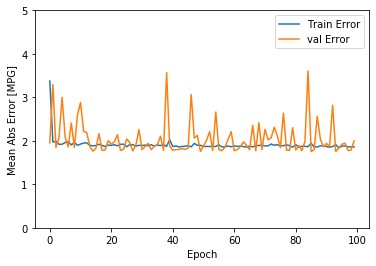

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

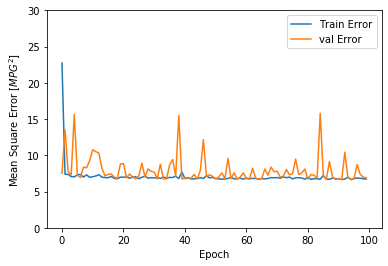

In [45]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [46]:
loss, mae, mse = model.evaluate(X_test, y_test)
mse**0.5

836/836 [==============================] - 0s 48us/sample - loss: 6.9036 - mae: 2.0028 - mse: 6.9036


2.627469036961549